<a href="https://colab.research.google.com/github/blckpwdr50/datasciencecoursera/blob/master/TRAIN_HS_PD_Day_11_Project_%5BDaniel_Schaben%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 11 Project: Analysis of Life Expectancy**
---

### **Description**
In this project, you will apply what you have learned so far and analyze a dataset containing information on the countries and factors influencing life expectancy. You are tasked with performing exploratory data analysis, cleaning and wrangling the data, and creating detailed visualizations. You will then train machine learning models to predict the life expectancy of countries and classify them based on development status.


<br>

###**About the Dataset**

Below is a list of variables in this dataset. You may not understand the meaning of every single variable. It is typical for ML practitioners to go into a project unaware of the full context within which their data lives. As you go through this project, consider if it would be helpful to learn more about any information you are unfamiliar with.

* `Country`: name of country
* `Region`: region the country is in
* `Year`: year (observed from 2000-2015)
* `Infant_deaths`: represents infant deaths per 1000 population
* `Under_five_deaths`: represents deaths of children under five years old per 1000 population
* `Adult_mortality`: represents deaths of adults per 1000 population
* `Alcohol_consumption`: represents alcohol consumption recorded in liters of pure alcohol per capita with 15+ years old
* `Hepatitis_B`: represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds
* `Measles`: represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
* `BMI`: average body mass index of entire population
* `Polio`: represents % of coverage of Polio (Pol3) immunization among 1-year-olds
* `Diphtheria`: represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds
* `Incidents_HIV`: incidents of HIV per 1000 population aged 15-49
* `GDP_per_capita`: gross domestic product (GDP) per capita (in USD)
* `Population_mln`: total population of the country in millions
* `Thinness_ten_nineteen_years`: prevalence of thinness among adolescents aged 10-19 years as a percentage; BMI < -2 standard deviations below the median
* `Thinness_five_nine_years`: prevalence of thinness among children aged 5-9 years as a percentage; BMI < -2 standard deviations below the median
* `Schooling`: average years that people aged 25+ spent in formal education
* `Economy_status_Developed`: whether or not it is a developed country (0: no, 1: yes)
* `Economy_status_Developing`: whether or not it is a developing country (0: no, 1: yes)
* `Life expectancy`: average life expectancy in age
<br>

### **Key questions to answer:**
1. Which preprocessing steps contribute to your model's predictive performance?
2. Can you observe any patterns in the dataset from your visualizations?
3. What features most strongly predict a country's life expectancy?
4. What features most strongly predict a country's economic development status?
5. How do KNN and Logistic Regression compare when both are used?

<br>

### **Goals:**
By the end of these projects, you will have:
1. Visualized relationships between various variables in the data.
2. Visualized the behavior of variables across features (e.g. grouped bar graphs, etc.).
3. Implemented linear regression, KNN, and logistic regression models tuned to best fit this dataset for a variety of tasks.

<br>

### **Lab Structure**
**Part 1**:  [Data Exploration, Wrangling, and Visualization](#p1)

**Part 2**:  [Predicting Life Expectancy](#p2)

> **Part 2.1**:  [Using All Numerical Features and Label Encodings](#p2.1)

> **Part 2.2**:  [Using All Numerical Features and Dummy Variable Encodings](#p2.2)

> **Part 2.3**:  [Using the 4 Best Numerical Features and the Best Encodings Where Relevant](#p2.3)

> **Part 2**:  [Wrapup](#p2w)

**Part 3**:  [Predicting Development Status](#p3)

> **Part 3**:  [Wrapup](#p3w)



</br>

### **Cheat Sheets**

* [Python basics](https://docs.google.com/document/d/1sbDvZXxqkqvaxEj7WM_nfhTI3q5Yut-9dz0IxEta-VA/edit?usp=drive_link)

* [EDA with pandas](https://docs.google.com/document/d/1lb58BaUQZi_Y9tvgeGuhmm2_oe88smVbpV9pqb1sFNI/edit?usp=drive_link)

* [Feature Engineering and Selection with pandas](https://docs.google.com/document/d/1fYANsUd4dKdgGHlAcvaugTihYIP7dku-yqYtjMh95LQ/edit?usp=drive_link)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1n8kwv3ysgSQL7siw8zOo8lvkwSell1LgW82xDIe9bf4/edit?usp=drive_link)

* [Advanced ML Techniques with sklearn](https://docs.google.com/document/d/16BeAevvvvCYJ5q0qLTl0SQnTPWnGkktwGYUxvnJMkE4/edit?usp=drive_link)

* [Linear Regression with sklearn](https://docs.google.com/document/d/1aymYoakMDdvRZJS4-NBCF5D54f4RQlCJFimz8Mf-uJI/edit?usp=drive_link)

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1bgOWUmWyPcc2rUinRsGNDjE04eQdMPq49PWbCGMOHSw/edit?usp=drive_link)

* [Logistic Regression with sklearn](https://docs.google.com/document/d/1jloY6eTv8Owf0k215SUVutgOk8OzeGYXCDi5X6B3xeY/edit?usp=drive_link)


<br>

**Before starting, run the code below to import all necessary functions, libraries, and data.**

In [ ]:
#!pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier


life_df = pd.read_csv("https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/Life-Expectancy-Data-Updated.csv")

<a name="p1"></a>

---
## **Part 1: Data Preparation**
---
In this section, you will conduct data exploration, wrangling, and visualization.


### **Problem #1.1**

Explore the dataset. This is your opportunity to become familiar with the data. Investigate the dataset's structure and examine different features.

In [ ]:
life_df.info()
life_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


### **Problem #1.2**

Clean the dataset.



In [ ]:
life_df.drop_duplicates(inplace = True)


life_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

### **Problem #1.3**

Determine the mean and standard deviation of the numerical variables and assess if scaling will be necessary before modeling or if the features are already close in scale.



In [ ]:
life_df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


### **Problem #1.4**

Create separate scatterplots for each of the following relationships:

1. `Adult_mortality` and `Life_expectancy`.
2. `Alcohol_consumption` and `Life_expectancy`.
3. `GDP_per_capita` and `Life_expectancy` with each `Region` colored differently.
4. `Population_mln` and `Life_expectancy` with each `Region` colored differently.
5. `Schooling` and `Life_expectancy` with each `Region` colored differently.

<br>

**Make sure to include a meaningful title, x-label, y-label, and legend for all plots.**

#### **1. `Adult_mortality` and `Life_expectancy`.**

[]

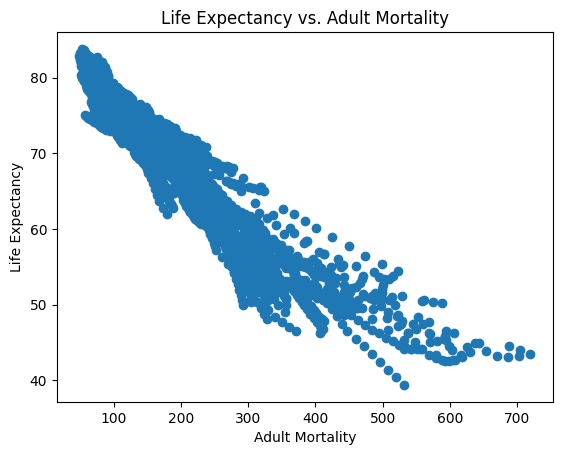

In [ ]:
plt.scatter(life_df['Adult_mortality'], life_df['Life_expectancy'])

plt.title('Life Expectancy vs. Adult Mortality')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')

plt.plot()

#### **2. `Alcohol_consumption` and `Life_expectancy`.**

[]

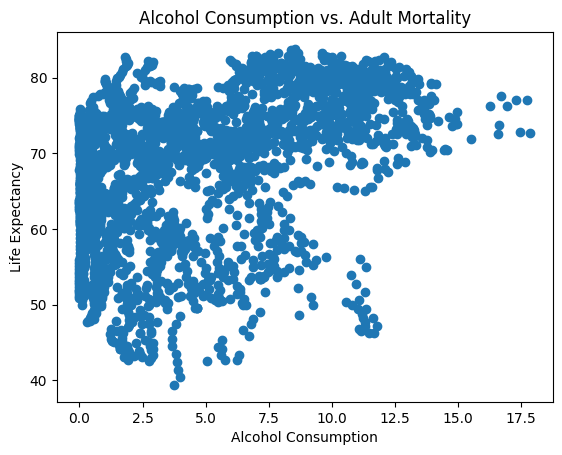

In [ ]:
plt.scatter(life_df['Alcohol_consumption'], life_df['Life_expectancy'])

plt.title('Alcohol Consumption vs. Adult Mortality')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')

plt.plot()

#### **3. `GDP_per_capita` and `Life_expectancy` with each `Region` colored differently.**

[]

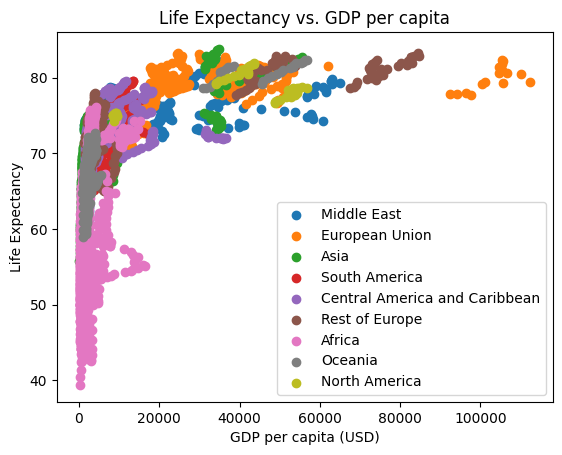

In [ ]:
me_rows = life_df['Region'] == 'Middle East'
eu_rows = life_df['Region'] == 'European Union'
asia_rows = life_df['Region'] == 'Asia'
sa_rows = life_df['Region'] == 'South America'
cac_rows = life_df['Region'] == 'Central America and Caribbean'
roe_rows = life_df['Region'] == 'Rest of Europe'
africa_rows = life_df['Region'] == 'Africa'
oceania_rows = life_df['Region'] == 'Oceania'
na_rows = life_df['Region'] == 'North America'


plt.scatter(life_df.loc[me_rows, 'GDP_per_capita'], life_df.loc[me_rows, 'Life_expectancy'], label = 'Middle East')
plt.scatter(life_df.loc[eu_rows, 'GDP_per_capita'], life_df.loc[eu_rows, 'Life_expectancy'], label = 'European Union')
plt.scatter(life_df.loc[asia_rows, 'GDP_per_capita'], life_df.loc[asia_rows, 'Life_expectancy'], label = 'Asia')
plt.scatter(life_df.loc[sa_rows, 'GDP_per_capita'], life_df.loc[sa_rows, 'Life_expectancy'], label = 'South America')
plt.scatter(life_df.loc[cac_rows, 'GDP_per_capita'], life_df.loc[cac_rows, 'Life_expectancy'], label = 'Central America and Caribbean')
plt.scatter(life_df.loc[roe_rows, 'GDP_per_capita'], life_df.loc[roe_rows, 'Life_expectancy'], label = 'Rest of Europe')
plt.scatter(life_df.loc[africa_rows, 'GDP_per_capita'], life_df.loc[africa_rows, 'Life_expectancy'], label = 'Africa')
plt.scatter(life_df.loc[oceania_rows, 'GDP_per_capita'], life_df.loc[oceania_rows, 'Life_expectancy'], label = 'Oceania')
plt.scatter(life_df.loc[na_rows, 'GDP_per_capita'], life_df.loc[na_rows, 'Life_expectancy'], label = 'North America')

plt.title('Life Expectancy vs. GDP per capita')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Expectancy')
plt.legend()

plt.plot()

#### **4. `Population_mln` and `Life_expectancy` with each `Region` colored differently.**

[]

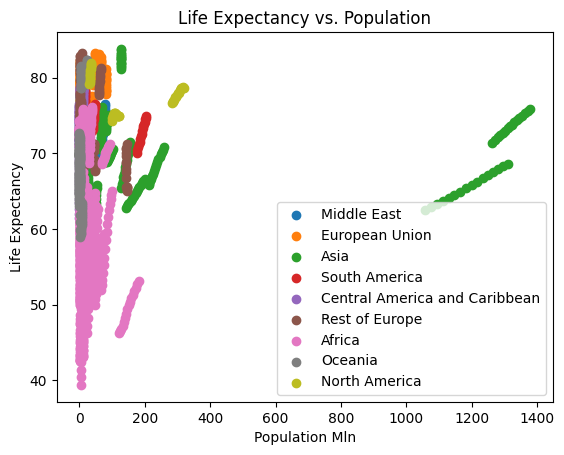

In [ ]:
me_rows = life_df['Region'] == 'Middle East'
eu_rows = life_df['Region'] == 'European Union'
asia_rows = life_df['Region'] == 'Asia'
sa_rows = life_df['Region'] == 'South America'
cac_rows = life_df['Region'] == 'Central America and Caribbean'
roe_rows = life_df['Region'] == 'Rest of Europe'
africa_rows = life_df['Region'] == 'Africa'
oceania_rows = life_df['Region'] == 'Oceania'
na_rows = life_df['Region'] == 'North America'


plt.scatter(life_df.loc[me_rows, 'Population_mln'], life_df.loc[me_rows, 'Life_expectancy'], label = 'Middle East')
plt.scatter(life_df.loc[eu_rows, 'Population_mln'], life_df.loc[eu_rows, 'Life_expectancy'], label = 'European Union')
plt.scatter(life_df.loc[asia_rows, 'Population_mln'], life_df.loc[asia_rows, 'Life_expectancy'], label = 'Asia')
plt.scatter(life_df.loc[sa_rows, 'Population_mln'], life_df.loc[sa_rows, 'Life_expectancy'], label = 'South America')
plt.scatter(life_df.loc[cac_rows, 'Population_mln'], life_df.loc[cac_rows, 'Life_expectancy'], label = 'Central America and Caribbean')
plt.scatter(life_df.loc[roe_rows, 'Population_mln'], life_df.loc[roe_rows, 'Life_expectancy'], label = 'Rest of Europe')
plt.scatter(life_df.loc[africa_rows, 'Population_mln'], life_df.loc[africa_rows, 'Life_expectancy'], label = 'Africa')
plt.scatter(life_df.loc[oceania_rows, 'Population_mln'], life_df.loc[oceania_rows, 'Life_expectancy'], label = 'Oceania')
plt.scatter(life_df.loc[na_rows, 'Population_mln'], life_df.loc[na_rows, 'Life_expectancy'], label = 'North America')

plt.title('Life Expectancy vs. Population')
plt.xlabel('Population Mln')
plt.ylabel('Life Expectancy')
plt.legend()

plt.plot()

#### **5. `Schooling` and `Life_expectancy` with each `Region` colored differently.**

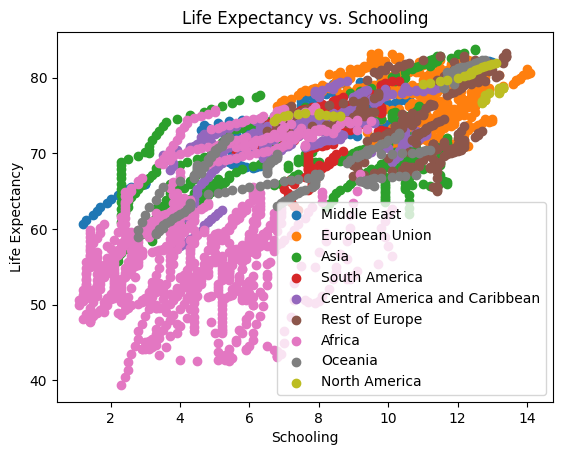

In [ ]:
me_rows = life_df['Region'] == 'Middle East'
eu_rows = life_df['Region'] == 'European Union'
asia_rows = life_df['Region'] == 'Asia'
sa_rows = life_df['Region'] == 'South America'
cac_rows = life_df['Region'] == 'Central America and Caribbean'
roe_rows = life_df['Region'] == 'Rest of Europe'
africa_rows = life_df['Region'] == 'Africa'
oceania_rows = life_df['Region'] == 'Oceania'
na_rows = life_df['Region'] == 'North America'


plt.scatter(life_df.loc[me_rows, 'Schooling'], life_df.loc[me_rows, 'Life_expectancy'], label = 'Middle East')
plt.scatter(life_df.loc[eu_rows, 'Schooling'], life_df.loc[eu_rows, 'Life_expectancy'], label = 'European Union')
plt.scatter(life_df.loc[asia_rows, 'Schooling'], life_df.loc[asia_rows, 'Life_expectancy'], label = 'Asia')
plt.scatter(life_df.loc[sa_rows, 'Schooling'], life_df.loc[sa_rows, 'Life_expectancy'], label = 'South America')
plt.scatter(life_df.loc[cac_rows, 'Schooling'], life_df.loc[cac_rows, 'Life_expectancy'], label = 'Central America and Caribbean')
plt.scatter(life_df.loc[roe_rows, 'Schooling'], life_df.loc[roe_rows, 'Life_expectancy'], label = 'Rest of Europe')
plt.scatter(life_df.loc[africa_rows, 'Schooling'], life_df.loc[africa_rows, 'Life_expectancy'], label = 'Africa')
plt.scatter(life_df.loc[oceania_rows, 'Schooling'], life_df.loc[oceania_rows, 'Life_expectancy'], label = 'Oceania')
plt.scatter(life_df.loc[na_rows, 'Schooling'], life_df.loc[na_rows, 'Life_expectancy'], label = 'North America')

plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()

### **Problem #1.5**

Create either 3 bar graphs or one grouped bar graph to show how the following variables are distributed across regions:
* Average `Hepatitis_B`
* Average `Measles`
* Average `Polio`

<br>

You will need to do this in two parts:
1. Calculate the average of each variable by species.
2. Plot these averages.

#### **1. Calculate the average of each variable by species.**

**Hint**: One approach would be to use `groupby(...)` and calculate the averages.

In [ ]:
df = life_df.groupby('Region')[['Hepatitis_B', 'Measles', 'Polio']]
means = df.mean()

#### **2. Plot these averages.**

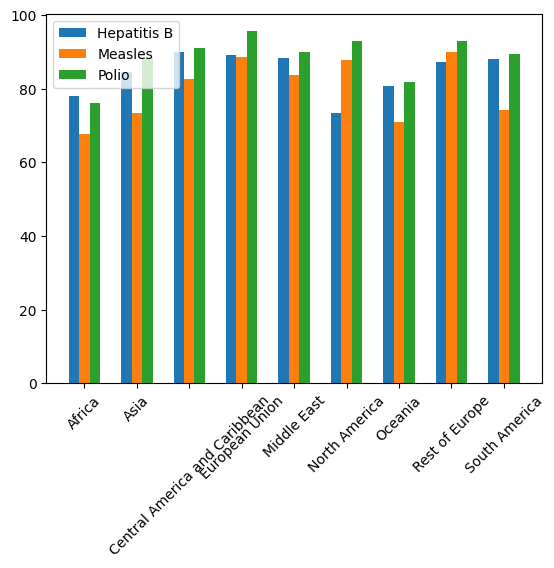

In [ ]:
plt.bar([-0.2, 0.8, 1.8, 2.8, 3.8, 4.8, 5.8, 6.8, 7.8], means['Hepatitis_B'].values, width = 0.2, label = 'Hepatitis B')
plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8], means['Measles'].values, width = 0.2, label = 'Measles')
plt.bar([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2], means['Polio'].values, width = 0.2, label = 'Polio')

plt.legend()

plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8], labels = means.index, rotation = 45)
plt.show()

<a name="p2"></a>

---
## **Part 2: Predicting Life Expectancy**
---

Now you will create, evaluate, and train a machine learning model to predict the average `Life_expectancy` of a country based on the provided numerical features. It is up to you to determine if you should use Linear Regression, KNN, or Logistic Regression. If it is possible to use multiple models and/or multiple hyperparameter values, you should use and compare all possible options within reason (ex: don't try more than 4-5 models for a given part).

<br>

You will satisfy each of the following:

**Part 2.1**: Using All Numerical Features and Label Encodings

**Part 2.2**: Using All Numerical Features and Dummy Variable Encodings

**Part 2.3**: Using the 4 Best Numerical Features and the Best Encodings Where Relevant

<br>

Don't forget to follow the 8 step process for implementing machine learning models!

<a name="p2.1"></a>

---
### **Part 2.1: Using All Numerical Features and Label Encodings**
---

#### **Step #1: Load the data**

This was completed in the beginning.

#### **Step #2: Determine the independent and dependent variables**

**NOTE**: Since `'Country'` is unique for each data point, this is not a useful feature. As such, this should not be included in your features.

In [ ]:
features = life_df.drop(columns = ['Life_expectancy', 'Country'])
label = life_df['Life_expectancy']

#### **Step #3: Split data into training and testing data**

During this step you should:
1. Split the data using the conventional 80/20 split.
2. Encode any categorical data using an ordinal encoder.
3. Standardize the data. **NOTE**: It's not entirely agreed upon whether you should scale encoded variables, but for simplicity's sake we will here. If you're curious, we encourage you to see how your models perform by standardizing only numerical continuous variables.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)

# Encode
enc = OrdinalEncoder()

cols = X_train.select_dtypes(include = object).columns
X_train[cols] = enc.fit_transform(X_train[cols])
X_test[cols] = enc.transform(X_test[cols])

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Step #4: Import the algorithm**

It's up to you whether this should be Linear Regression, KNN, or Logistic Regression.

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5:  Initialize the model and set hyperparameters**


In [ ]:
model_1=LinearRegression()


#### **Steps #6 - 7: Fit your model, evaluating using 10-Folds Cross Validation. Create a visualization if applicable**

Specifically,

1. Determining an average relevant evaluation metric using 10-Folds Cross Validation.
2. Visualize the results of cross validation.
3. Train a model to use for predictions below. **NOTE**: Do *not* use the test set at any point in this section.

##### **1. Fit the model to the training data, determining an average relevant evaluation metric using 10-Folds Cross Validation.**


**NOTE**: The y-data in this section is still in the form of a pandas DataFrame, so to access a specific index you need to use `.iloc[...]`.

In [ ]:
model_1.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
scores_1 = cross_val_score(model_1, X_train_scaled, y_train, cv=10)

print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

10-Folds CV Scores: 0.9790274643511129 +/- 0.0008329635099817909


##### **2. Visualize the results.**

Plot the performance results.

<br>

**NOTE**: As we plot more and more on the same figure, it can be helpful to move the legend off the plot. You can use and modify the following code to accomplish this: `plt.legend(bbox_to_anchor=(1.1, 1.05))` instead of `plt.legend()`.

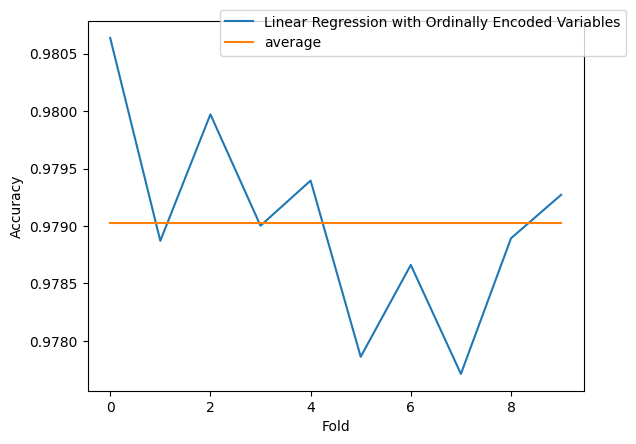

In [ ]:
plt.plot(scores_1, label = 'Linear Regression with Ordinally Encoded Variables')
plt.plot([scores_1.mean() for i in range(10)], label = 'average')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

##### **3. Train a model to use for predictions below.**

In [ ]:
model_1.fit(X_train_scaled,y_train)

In [ ]:
score_1=cross_val_score(model_1,X_train_scaled,y_train,cv=10)
print('10 folds score: '+str(score_1.mean())+'+/-'+ str(score_1.std()))

10 folds score: 0.9790274643511129+/-0.0008329635099817909


#### **Step #8: Use the model**

Specifically,

1. Predict the average life expectancy of two new countries.

2. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the life expectancy of these new countries:**

**Country 1**

* `Region`: `Africa`
* `Year`: 2012
* `Infant_deaths`: 32
* `Under_five_deaths`: 41
* `Adult_mortality`: 417
* `Alcohol_consumption`: 1.2
* `Hepatitis_B`: 74
* `Measles`: 68
* `BMI`: 21
* `Polio`: 76
* `Diphtheria`: 71
* `Incidents_HIV`: 12.2
* `GDP_per_capita`: 56824
* `Population_mln`: 112
* `Thinness_ten_nineteen_years`: 7
* `Thinness_five_nine_years`: 11
* `Schooling`: 9
* `Economy_status_Developed`: 0
* `Economy_status_Developing`: 1

<br>

**Country 2**

* `Region`: `North America`
* `Year`: 2012
* `Infant_deaths`: 121
* `Under_five_deaths`: 63
* `Adult_mortality`: 269
* `Alcohol_consumption`: 2.7
* `Hepatitis_B`: 87
* `Measles`: 81
* `BMI`: 27
* `Polio`: 88
* `Diphtheria`: 88
* `Incidents_HIV`: 2.6
* `GDP_per_capita`: 73451
* `Population_mln`: 341
* `Thinness_ten_nineteen_years`: 4
* `Thinness_five_nine_years`: 7
* `Schooling`: 13
* `Economy_status_Developed`: 1
* `Economy_status_Developing`: 0

<br>

**NOTE**: You will need to use your `StandardScaler` to transform these new points *and* you will need to determine how these countries are represented in this given encoding.

In [ ]:
new_countries = pd.DataFrame([['Africa', 2012, 32, 41, 417, 1.2, 74, 68, 21, 76, 71, 12.2, 56824, 112, 7, 11, 9, 0, 1],
                  ['North America', 2012, 121, 63, 269, 2.7, 87, 81, 27, 88, 88, 2.6, 73451, 341, 4, 7, 13, 1, 0]],
                 columns = X_train.columns)

new_countries[cols] = enc.transform(new_countries[cols])
data = scaler.transform(new_countries)

new_prediction = model_1.predict(data)

print("Predicted life expectancies: ", new_prediction)

Predicted life expectancies:  [60.51925591 61.76457484]


##### **2. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Life_expectancy"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,0.069152,0.109532,-1.475215,-2.295834,-5.583255,0.257687,-0.146763,0.041388,-0.307642,0.054624,0.027791,0.238051,0.417101,-0.017126,-0.158787,0.021661,0.271989,0.151992,-0.151992


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Life_expectancy
0,68.797163


<a name="p2.2"></a>

---
### **Part 2.2: Using All Numerical Features and Dummy Variable Encodings**
---

#### **Steps #1 - 5:**
1. Load the data.
2. Determine the independent and dependent variables.
3. Split data into training and testing data (encode and standardize appropriately).
4. Import the algorithm.
5. Initialize the model and set hyperparameters.

In [ ]:
# Load the data
life_df.dtypes
features = life_df.drop(columns = ['Life_expectancy', 'Country'], axis = 1)
label = life_df['Life_expectancy']



# Step 3 Split data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)

# Encode dv stands for dummy variable
cols = X_train.select_dtypes(include = object).columns
X_train_dv = X_train.drop(columns = cols)
X_test_dv = X_test.drop(columns = cols)

dv_enc = OneHotEncoder(sparse_output = False, drop = 'first')
dv_enc.set_output(transform = 'pandas')

dv_enc.fit(X_train[cols])
dv_columns = dv_enc.get_feature_names_out()

X_train_dv[dv_columns] = dv_enc.transform(X_train[cols])
X_test_dv[dv_columns] = dv_enc.transform(X_test[cols])


# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dv)
X_test_scaled = scaler.transform(X_test_dv)



# Step 4
from sklearn.linear_model import LinearRegression

# Step 5
model_2 = LinearRegression()


#### **Steps #6 - 7:**

Evaluate using 10-Folds Cross Validation and visualize the performance results. Then train a final model.



<br>

**NOTE**: As stated above, you can use and modify the following code to accomplish this: `plt.legend(bbox_to_anchor=(1.1, 1.05))` instead of `plt.legend()`.

In [ ]:
scores_2 = cross_val_score(model_2, X_train_scaled, y_train, cv=10)

print("10-Folds CV Scores: " + str(scores_2.mean()) + " +/- " + str(scores_2.std()))

10-Folds CV Scores: 0.983769260918851 +/- 0.0013186357702850407


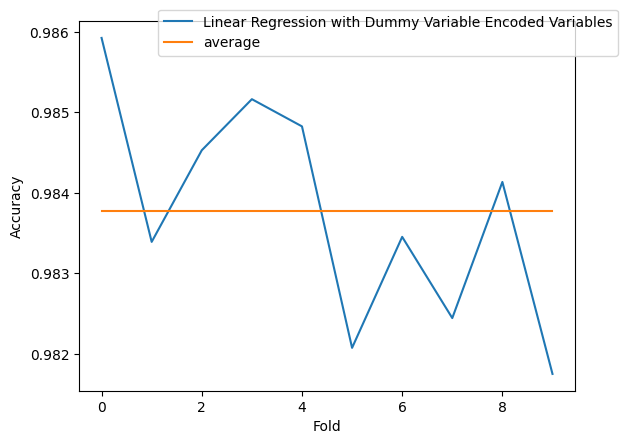

In [ ]:
plt.plot(scores_2, label = 'Linear Regression with Dummy Variable Encoded Variables')
plt.plot([scores_2.mean() for i in range(10)], label = 'average')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

In [ ]:
model_2.fit(X_train_scaled, y_train)

LinearRegression()

#### **Step #8: Use the model**

Specifically,

1. Predict the average life expectancy of two new countries.

2. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the life expectancy of these new countries:**

**Country 1**

* `Region`: `Africa`
* `Year`: 2012
* `Infant_deaths`: 32
* `Under_five_deaths`: 41
* `Adult_mortality`: 417
* `Alcohol_consumption`: 1.2
* `Hepatitis_B`: 74
* `Measles`: 68
* `BMI`: 21
* `Polio`: 76
* `Diphtheria`: 71
* `Incidents_HIV`: 12.2
* `GDP_per_capita`: 56824
* `Population_mln`: 112
* `Thinness_ten_nineteen_years`: 7
* `Thinness_five_nine_years`: 11
* `Schooling`: 9
* `Economy_status_Developed`: 0
* `Economy_status_Developing`: 1

<br>

**Country 2**

* `Region`: `North America`
* `Year`: 2012
* `Infant_deaths`: 121
* `Under_five_deaths`: 63
* `Adult_mortality`: 269
* `Alcohol_consumption`: 2.7
* `Hepatitis_B`: 87
* `Measles`: 81
* `BMI`: 27
* `Polio`: 88
* `Diphtheria`: 88
* `Incidents_HIV`: 2.6
* `GDP_per_capita`: 73451
* `Population_mln`: 341
* `Thinness_ten_nineteen_years`: 4
* `Thinness_five_nine_years`: 7
* `Schooling`: 13
* `Economy_status_Developed`: 1
* `Economy_status_Developing`: 0

<br>

**NOTE**: You will need to use your `StandardScaler` to transform these new points *and* you will need to determine how these countries are represented in this given encoding.

In [ ]:
new_countries = pd.DataFrame([['Africa', 2012, 32, 41, 417, 1.2, 74, 68, 21, 76, 71, 12.2, 56824, 112, 7, 11, 9, 0, 1],
                  ['North America', 2012, 121, 63, 269, 2.7, 87, 81, 27, 88, 88, 2.6, 73451, 341, 4, 7, 13, 1, 0]],
                 columns = X_train.columns)

new_countries_dv = new_countries.drop(columns = cols)
new_countries_dv[dv_columns] = dv_enc.transform(X_train[cols])

data = scaler.transform(new_countries_dv)

new_prediction = model_2.predict(data)

print("Predicted life expectancies: ", new_prediction)

Predicted life expectancies:  [60.71500296 62.12379253]


##### **2. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_2.coef_
intercept = model_2.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test_dv.columns)
intercept = pd.DataFrame([intercept], columns = ["Life_expectancy"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developed,Economy_status_Developing,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,0.161305,-1.581143,-2.10322,-5.40418,-0.023286,-0.116085,0.05489,-0.269382,0.129943,-0.110909,...,0.513404,-0.513404,0.14598,0.617701,-0.199297,0.080017,0.108545,-0.17836,0.101199,0.467731


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Life_expectancy
0,68.797163


<a name="p2.3"></a>

---
### **Part 2.3: Using the 4 Best Numerical Features and the Best Encodings Where Relevant**
---

In this section, you should use the results of above and the `SelectKBest(...)` function to create a model using the 4 best numerical features and the best encodings to create a new model.

#### **Steps #1-8: Carry out the machine learning process the same as above.**

**Suggestions**:
* `SelectKBest(...)` should be used *after* splitting the data and only determined by the training set to avoid any possible data leakage.
* `SelectKBest(...)` is only for numerical features, so you should choose 4 numerical features *and* encode the categorical features.
* You should visualize both of the CV evaluation scores from Parts 2.1 - 2.2 to compare and choose a good encoding.
* You should visually compare the CV evaluation scores for all 3 models trained in Part 2 to determine the best one.
* It may be helpful to add additional code cells to build your model incrementally.
* As stated above, you can use and modify the following code to accomplish this: `plt.legend(bbox_to_anchor=(1.1, 1.05))` instead of `plt.legend()`.

In [ ]:
life_df.dtypes
features = life_df.drop(columns = ['Life_expectancy', 'Country'], axis = 1)
label = life_df['Life_expectancy']


# Step 3
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)

cols = X_train.select_dtypes(include = object).columns
X_train_best = X_train.drop(columns = cols)
X_test_best = X_test.drop(columns = cols)

feature_selector = SelectKBest(k = 4)
feature_selector.fit_transform(X_train_best, y_train)
X_train_best = X_train_best[feature_selector.get_feature_names_out()]
X_test_best = X_test_best[feature_selector.get_feature_names_out()]

# Encode
dv_enc = OneHotEncoder(sparse_output = False, drop = 'first')
dv_enc.set_output(transform = 'pandas')

dv_enc.fit(X_train[cols])
dv_columns = dv_enc.get_feature_names_out()

X_train_best[dv_columns] = dv_enc.transform(X_train[cols])
X_test_best[dv_columns] = dv_enc.transform(X_test[cols])


# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_best)
X_test_scaled = scaler.transform(X_test_best)



# Step 4
from sklearn.linear_model import LinearRegression

# Step 5
model_3 = LinearRegression()

# Steps 6 - 7
scores_3 = cross_val_score(model_3, X_train_scaled, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_3.mean()) + " +/- " + str(scores_3.std()))

model_3.fit(X_train_scaled, y_train)

10-Folds CV Scores: 0.980717525902071 +/- 0.00205274126381351


LinearRegression()

<a name="p2w"></a>

---
### **Part 2: Wrap-up**
---

Now that you have trained several models to accomplish this task, answer the following questions:


1. Using only the best performing model according to the CV evaluation scores, what is its average performance according to K-Folds CV? What is its performance on the test set? **NOTE**: Round to the 3rd decimal place for simplicity.
2. Is Linear Regression, KNN, or Logistic Regression better suited for this task? Why?
3. Are there any hyperparameters you need to tune and, if so, what are the best values you found?
4. What seemed to play the largest role in improving model performance: selecting fewer features, a specific encoding, both, or neither.
5. What 3 variables seem to play the largest role in determining the `Life_expectancy`? **Hint**. Since the data is standardized, we can directly consider the relative size of the coefficients.
6. What does your model claim the average life expectancy to be, regardless of any features? **Hint**. This is the part of your model that is unrelated to any features.

<a name="p3"></a>

---
## **Part 3: Predicting Development Status**
---

Now you will create, evaluate, and train an ML model to predict `Economy_status_Developed` based on the provided numerical features. It is up to you to determine if you should be using Linear Regression, KNN, or Logistic Regression here. If it is possible to use multiple models and/or multiple hyperparameter values, you should use and compare all possible options within reason (ex: don't try more than 4-5 models for a given part).

<br>

In this section, we will not break down the steps for you, but rather provide a few guiding questions throughout to help you find the best possible model.

### **Problem #3.1**

Using 10-Folds CV, evaluate the performance of any relevant models in predicting `Economy_status_Developed` using all numerical features and ordinally encoding all categorical features (except `Country`, which you should still drop like above). Make sure you carry out proper standardization procedures and try to evaluate as wide a range of models as possible.

**NOTE**: Do not worry about making predictions (Step #8), rather just get the CV scores of any models you consider.

### **Problem #3.2**

Did you happen to see any of your models perform perfectly (score of 1.0) during CV? If *any* model displays this (and definitely if *multiple* models do), you should be suspicious--it's almost always too good to be true!

<br>

This is usually a sign of data leakage or otherwise mishandled data. You should respond by:
1. Going line by line to ensure you have not accidentally caused any data leakage (ex: encoded, scaled, or otherwise done anything before splitting your data).
2. Exploring the data itself to see if there are any features that may be giving our models an unfair advantage.

<br>

Assuming you have coded things in the correct order, as we led you through in Part 2, we are most likely facing the second problem. We should:
1. See if there are any features that give away the answer or are otherwise unrealistic for us to have when using the model in the real world.

2. Drop all such features.

#### **1. See if there are any features that give away the answer or are otherwise unrealistic for us to have when using the model in the real world.**

In particular, run the two cells below to see the *correlations* between the features and the label. You do not need to worry about the mathematical details of this statistical measure here. Instead, just focus on the following information. If two variables have a correlation of:

* **-1 or 1, they are *perfectly correlated*.** This means if you know one of them, you can always figure out the other. We should *almost always* drop one of these variables if we want our model to be at all useful or realistic.
* **Close to -1 or 1, they are *highly correlated*.** Depending on how close to -1 or 1 it is, this can be suspicious or too good to be true. Or perhaps they're good variables to use.
* **0, they are *completely uncorrelated*.** This means they have absolutely no measurable relationship to each other. These variables are fine to include, but if one of them is a feature and the other a label then that feature is unlikely to help our model at all.

In [ ]:
life_df.corr()['Economy_status_Developed']

In [ ]:
# Just a fancy way to visualize the correlations.
import seaborn as sns
sns.heatmap(life_df.corr())

#### **2. Drop all such features.**

Drop all features with a correlation of 1 or -1 from the `features` data frame.

In [ ]:
features = # COMPLETE THIS CODE

### **Reflection Question**

Before moving on, ensure you can answer the following question: beyond what the correlation says, *why* should this feature/these features be dropped? In other words, why is it unrealistic or not useful to include this feature when creating an ML model to predict `Economy_status_Developed` and why might these variables be too highly correlated?

### **Problem #3.3**

Now, redo your work from Problem #3.1 with this feature/these features dropped.

### **Problem #3.4**

Next, redo your work from Problem #3.3 with the categorical features dummy variable encoded. Compare the CV performance scores of any models trained here to the best model from Problem #3.3.

### **Problem #3.5**

Lastly, redo your work from Problem #3.3 - 3.4 using a smaller number of numerical features (ex: 1 - 4) and the best encoding of variables.

<a name="p3w"></a>

---
### **Part 3: Wrapup**
---

Now that you have trained several models to accomplish this task, answer the following questions:


1. Using only the best performing model according to the CV evaluation scores, what is its average performance according to K-Folds CV? What is its performance on the test set? **NOTE**: Round to the 3rd decimal place for simplicity.
2. Is Linear Regression, KNN, or Logistic Regression better suited for this task? Why?
3. Are there any hyperparameters you need to tune and, if so, what are the best values you found?
4. What seemed to play the largest role in improving model performance: selecting fewer features, a specific encoding, both, or neither.
5. Are you confident in these results? Why or why not?

---
#End of Notebook

© 2023 The Coding School, All rights reserved